In [ ]:
# # prompt: connect to drive

# from google.colab import drive
# drive.mount('/content/drive/')


# **Dự đoán khả năng mắc AIDS**




## Bối cảnh của bài toán
- Bệnh AIDS (acquired immunodeficiency syndrome - hội chứng suy giảm miễn dịch mắc phải), hay HIV/AIDS, là một trong những vấn đề sức khỏe toàn cầu nghiêm trọng, gây ra bởi virus HIV khi loại virus này tấn công vào hệ miễn dịch của cơ thể. Không chỉ gây ra những vấn đề sức khỏe nghiêm trọng như suy giảm miễn dịch và các bệnh liên quan, AIDS còn là một trong những nguyên nhân gây ra tử vong cao. Tuy đã có những tiến bộ trong việc điều trị và quản lý bệnh, nhưng vẫn còn nhiều thách thức, đặc biệt là việc phát hiện sớm và điều trị kịp thời.
- Theo các thống kê từ tổ chức Y tế Thế giới (WHO), dù đã có những nỗ lực để kiểm soát bệnh AIDS, nhưng vẫn có hàng triệu người mắc bệnh mỗi năm, và trình trạng này đặc biệt nghiêm trọng ở những khu vực có tài nguyên y tế hạn chế. Điều này thúc đẩy nhu cầu can thiệp và điều trị kịp thời, từ đó giảm thiểu sự lan truyền của virus và cải thiện chất lượng cuộc sống của những người bị ảnh hưởng. Điều này thể hiện sự cần thiết và tính cấp bách của việc nghiên cứu và áp dụng các phương pháp dự đoán AIDS trong việc quản lý và kiểm soát dịch bệnh.

## Thời gian thực hiện đề tài:
- Đề tài được thực trong tháng 5/2024

## Tập dữ liệu được sử dụng:
AIDS Virus Infection Prediction 💉:

*link:*: https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction

## Giới thiệu về tập dữ liệu được sử dụng
**Mô tả**:
- Tập dữ liệu này bao gồm các thống kê y tế và các thông tin phân loại về những bệnh nhân đã được chẩn đoán nhiễm AIDS. Tập dữ liệu này được đăng vào năm 1996.
- Tập dữ liệu bao gồm nhiều file csv khác nhau, có những số lượng record khác nhau (từ 2000-50000 record) và để đảm bảo khả năng dự đoán, chúng ta sẽ dùng tập dữ liệu cao nhất là 50000 record.

**Các thuộc tính**:
- `time`: thời gian thực hiện nghiên cứu cho đến khi bị suy gan (theo ngày).
- `trt`: liệu pháp điều trị
  + 0: chỉ ZDV.
  + 1: ZDV + ddl
  + 2: ZDV + Zal
  + 3: chỉ ddl.
- `age`: tuổi tính theo năm.
- `wtkg`: cân nặng theo kg.
- `hemo`: mắc bệnh giảm đông máu (hemophila) (0: false, 1: true).
- `homo`: hoạt động đồng tính (0: false, 1: true)
- `drugs`: lịch sử dùng ma túy theo đường tĩnh mạch (IV) (0: false, 1: true).
- `karnof`: điểm số Karnofsky dùng để đánh giá chất lượng cuộc sống (từ 0: qua đời, đến 100: chất lượng sống cao nhất).
- `oprior`: đã dùng thuốc chống ức chế virus không ZDV hay chưa. (0: false, 1: true)
- `z30`: sử dụng zdv trong 30 ngày. (0: false, 1: true)
- `preanti`: số ngày dùng liệu pháp chống ức chế nhân lên của virus (antiretroviral).
- `race`: sắc tộc (0: trắng, 1: còn lại).
- `gender`: giới tính (0: F, 1: M)
- `str2`: lịch sử dùng antiretroviral. (0: chưa, 1: đã trải qua).
- `strat`: phân loại lịch sử dùng antiretroviral.
  + 1: chưa dùng
  + 2: đã dùng thuốc trong từ 1 đến 52 tuần.
  + 3: đã dùng hơn 52 tuần.
- `symptom`: có triệu chứng bệnh không (0:asymp - không có, 1; symp - có).
- `treat`: liệu pháp điều trị (0: chỉ ZDV , 1: khác).
- `offtrt`: có dùng sử dụng trong 96+/- 5 tuần không (0: false, 1: true).
- `cd40`: số lượng tế bào miễn dịch CD4.
- `cd420`: số lượng tế bào CD4 trong 20+/-5 tuần.
- `cd80`: số lượng tế bào cd8.
- `cd820`: số lượng tế bào CD8 trong 20+/-5 tuần.
- `infected`: cho biết có nhiễm hay không (0: false, 1: true).




## Khai phá dữ liệu

### Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, make_scorer, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel, RFE

from xgboost import XGBClassifier



In [ ]:
#50000
# data = pd.read_csv('https://drive.google.com/uc?export=download&id=1-lKMqr6spNPX_RaYzXQ1KqeUNc4SpQkg')
#15000
# data = pd.read_csv('https://drive.google.com/uc?export=download&id=17x-ESamAaCKP_SF78Dd2UTMIXj-epFxq')
#5000
# data = pd.read_csv('https://drive.google.com/uc?export=download&id=1eaAq8ybq7qxf10eWwxwDRK8jqBXr7uL0')
#2000
data = pd.read_csv('https://drive.google.com/uc?export=download&id=10nymCe3Hl7w71R-0u3UZhRkLGcv2vJ0d')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

Không có dữ liệu null ở các đặc trưng

In [ ]:
df.shape

(2139, 23)

Tập dữ liệu có 50000 mẫu và 23 đặc trưng

### Một vài giá trị đầu tiên

In [ ]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


### Mô tả dữ liệu

In [ ]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


### Kiểm tra dữ liệu trùng lặp

In [ ]:
df.duplicated().sum()

0

Không có dữ liệu trùng lặp

# Xử lý các thuộc tính
## Thuộc tính định lượng
### time

In [ ]:
df['time'].describe()

count    2139.000000
mean      879.098177
std       292.274324
min        14.000000
25%       727.000000
50%       997.000000
75%      1091.000000
max      1231.000000
Name: time, dtype: float64

In [ ]:
Q1 = np.quantile(df['time'], 0.25)
Q1

727.0

In [ ]:
Q3 = np.quantile(df['time'], 0.75)
Q3

1091.0

In [ ]:
IQR = Q3 - Q1
IQR

364.0

In [ ]:
Range = df['time'].max() - df['time'].min()
Range

1217

In [ ]:
df['time'].var()

85424.28034746922

In [ ]:
df['time'].skew()

-1.1217076490553664

In [ ]:
df['time'].kurtosis()

0.02623848883863067

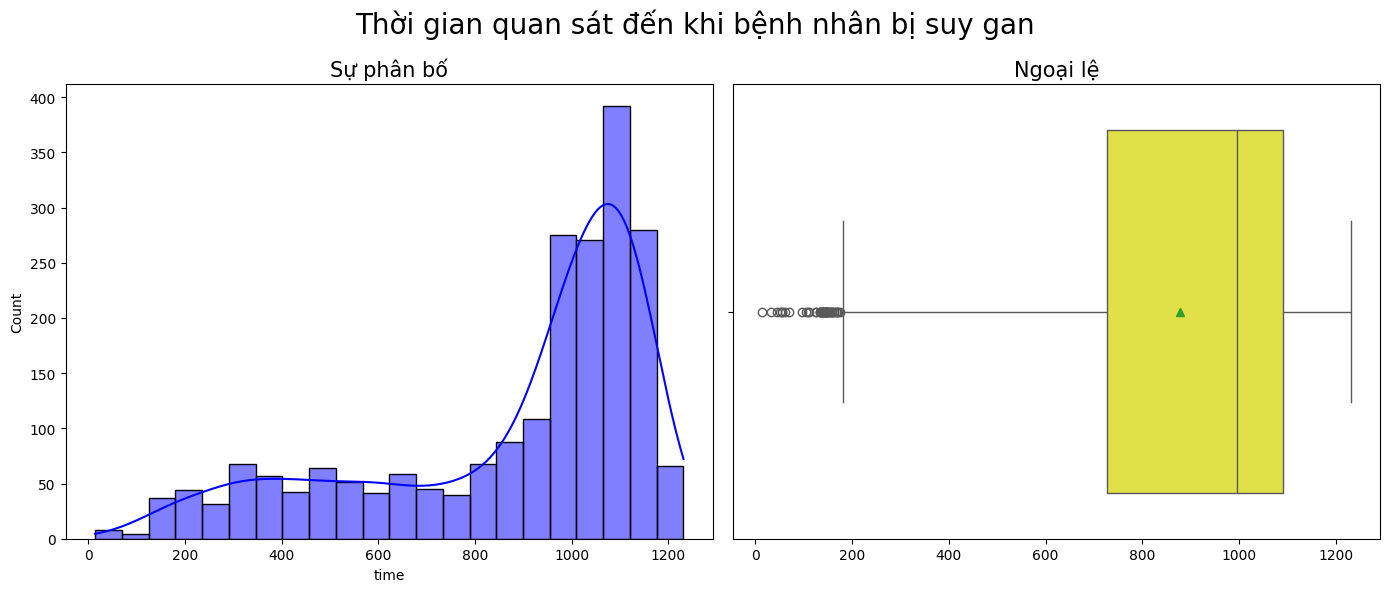

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Thời gian quan sát đến khi bệnh nhân bị suy gan', fontsize=20)
axes[0]=sns.histplot(df, x='time', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['time'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Ta nhận thấy ràng có sự phân phối đa điểm phức tạp trong phân bố của dữ liệu. Điều này cho thấy, dữ liệu trên không phải là một phân phối đơn giản, cụ thể là nó có thể chứa các nhóm dữ liệu riêng biệt hoặc các cụm dữ liệu riêng biệt.
- Các giá trị ngoại lệ có thời gian quan sát ngắn (dưới khoảng 200 ngày).
- Các giá trị ngoại lệ không có vấn đề bất thường (từ 14-1231, theo thống kê từ kaggle).

### age

In [ ]:
df['age'].describe()

count    2139.000000
mean       35.248247
std         8.709026
min        12.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        70.000000
Name: age, dtype: float64

In [ ]:
Q1 = np.quantile(df['age'], 0.25)
Q1

29.0

In [ ]:
Q3 = np.quantile(df['age'], 0.75)
Q3

40.0

In [ ]:
IQR = Q3 - Q1
IQR

11.0

In [ ]:
Range = df['age'].max() - df['age'].min()
Range

58

In [ ]:
df['age'].var()

75.8471379446521

In [ ]:
df['age'].skew()

0.6424715060657828

In [ ]:
df['age'].kurtosis()

0.9776852790122885

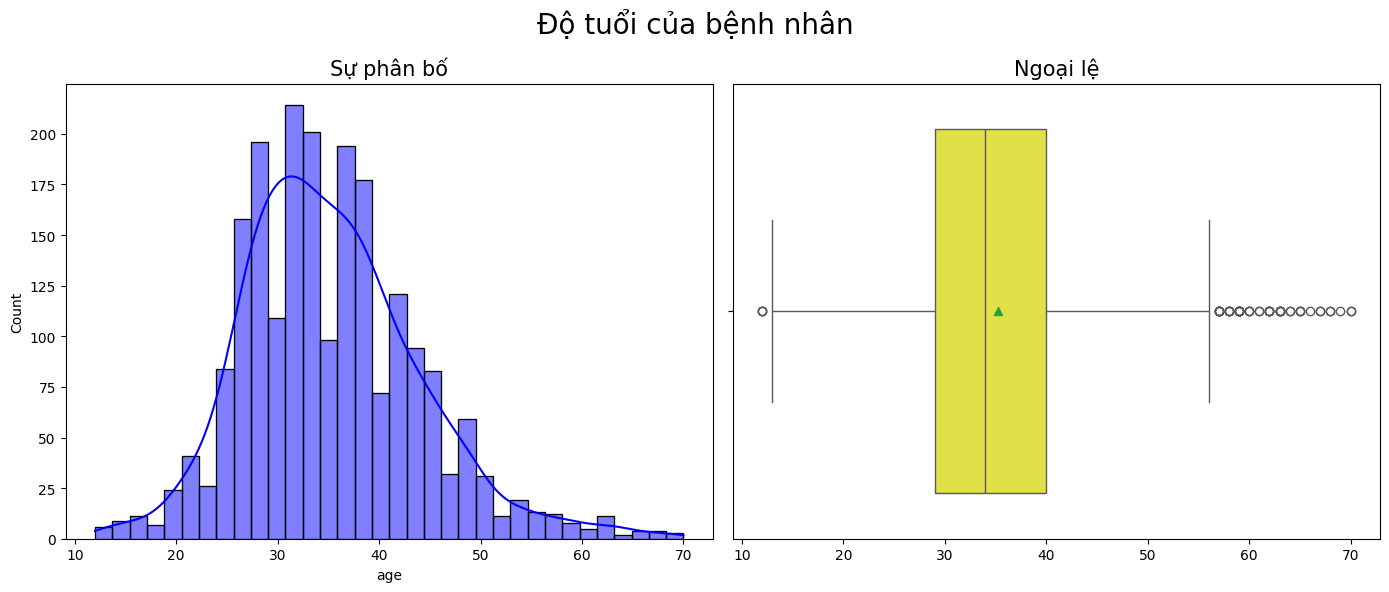

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Độ tuổi của bệnh nhân', fontsize=20)
axes[0]=sns.histplot(df, x='age', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['age'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Ta nhận thấy đồ thị có xu hướng lệch phải.
- Bệnh nhân có độ tuổi nhiều nhất là từ 30 đến 40 tuổi.
- các giá trị ngoại lệ có giá trị từ khoảng 55 đến 70 tuổi. Đây là các giá trị hợp lệ, nên ta sẽ không xử lý các ngoại lệ này.

### wtkg

In [ ]:
df['wtkg'].describe()

count    2139.000000
mean       75.125311
std        13.263164
min        31.000000
25%        66.679200
50%        74.390400
75%        82.555200
max       159.939360
Name: wtkg, dtype: float64

In [ ]:
Q1= np.quantile(df['wtkg'], 0.25)
Q1

66.6792

In [ ]:
Q3 = np.quantile(df['wtkg'], 0.75)
Q3

82.5552

In [ ]:
IQR = Q3 - Q1
IQR

15.876000000000005

In [ ]:
Range = df['wtkg'].max() - df['wtkg'].min()
Range

128.93936

In [ ]:
df['wtkg'].var()

175.91151938422513

In [ ]:
df['wtkg'].skew()

0.7064860599637041

In [ ]:
df['wtkg'].kurtosis()

2.2290396224135995

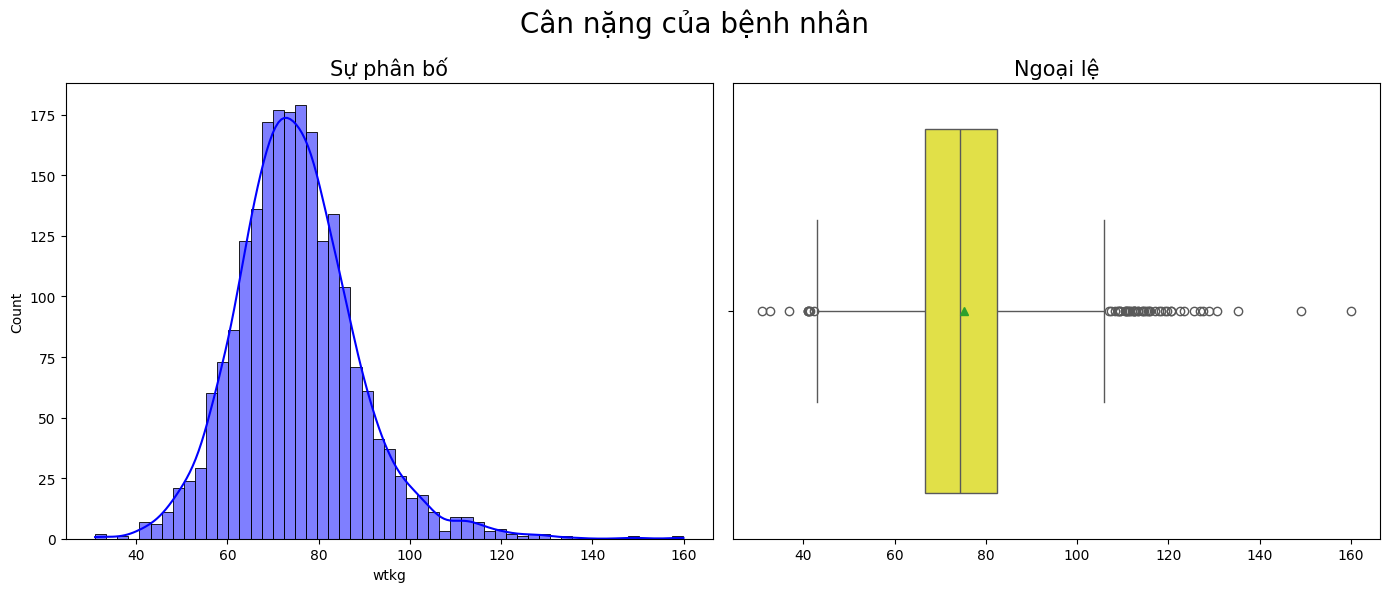

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Cân nặng của bệnh nhân', fontsize=20)
axes[0]=sns.histplot(df, x='wtkg', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['wtkg'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đồ thị có xu hướng lệch trái. Có phân phối chuẩn.
- Bệnh nhân có cân nặng chủ yếu từ 70-80kg.
- Có nhiều giá trị ngoại lệ, các giá trị ngoại lệ này nằm từ dưới 40 kg và trên 110 kg. Tuy nhiên, các giá trị cân nặng này vẫn tồn tại trong thực tế. Nên trong trường hợp này, ta sẽ không loại bỏ chúng.

### Điểm Karrnofsky

In [ ]:
df['karnof'].describe()

count    2139.000000
mean       95.446470
std         5.900985
min        70.000000
25%        90.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: karnof, dtype: float64

In [ ]:
Q1 = np.quantile(df['karnof'], 0.25)
Q1

90.0

In [ ]:
Q3 = np.quantile(df['karnof'], 0.75)
Q3

100.0

In [ ]:
IQR = Q3 - Q1
IQR

10.0

In [ ]:
Range = df['karnof'].max() - df['karnof'].min()
Range

30

In [ ]:
df['karnof'].var()

34.82161873286477

In [ ]:
df['karnof'].skew()

-1.0276213559749043

In [ ]:
df['karnof'].kurtosis()

0.6950742645693944

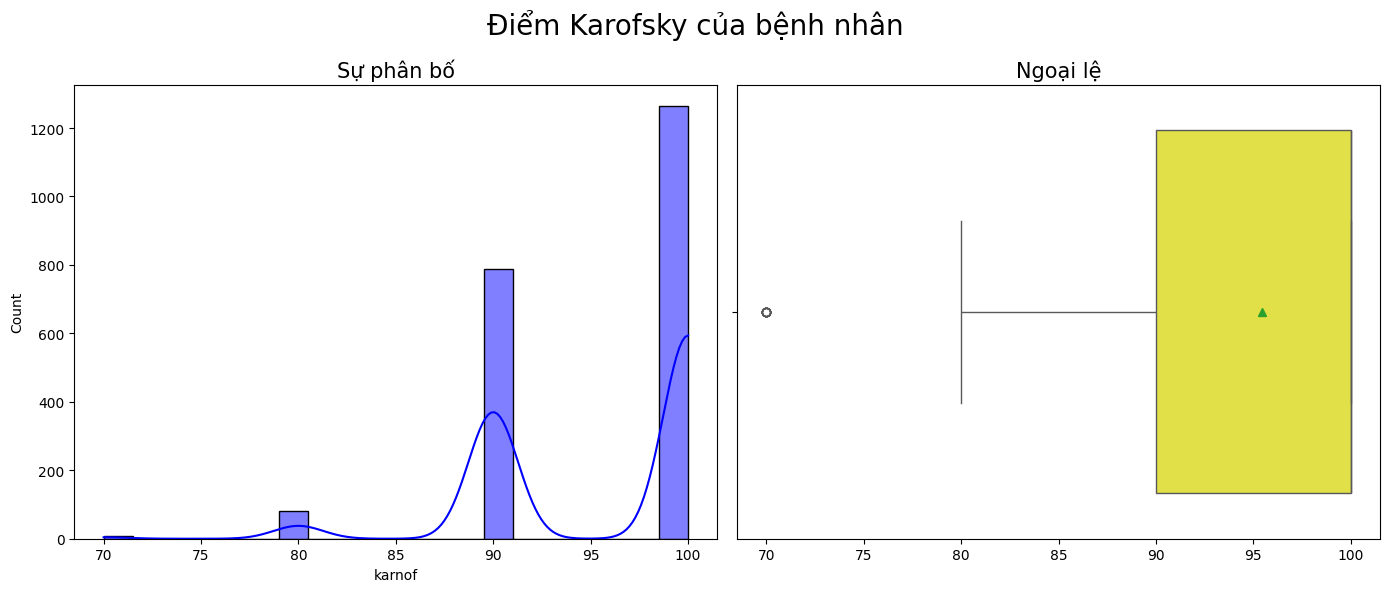

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Điểm Karofsky của bệnh nhân', fontsize=20)
axes[0]=sns.histplot(df, x='karnof', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['karnof'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Phần lớn bệnh nhân có điểm số nằm trong khoảng 90 và khoảng 100.
- Chỉ có ngoại lệ duy nhất với các bệnh nhân có điểm số là 70. Tuy nhiên, điểm số này không phải là không thể xảy ra nên ta sẽ không loại bỏ nó.

### preanti

In [ ]:
df['preanti'].describe()

count    2139.000000
mean      379.175783
std       468.657526
min         0.000000
25%         0.000000
50%       142.000000
75%       739.500000
max      2851.000000
Name: preanti, dtype: float64

In [ ]:
Q1 = np.quantile(df['preanti'], 0.25)
Q1

0.0

In [ ]:
Q3 = np.quantile(df['preanti'], 0.75)
Q3

739.5

In [ ]:
IQR = Q3 - Q1
IQR

739.5

In [ ]:
Range = df['preanti'].max() - df['preanti'].min()
Range

2851

In [ ]:
df['preanti'].var()

219639.8764759417

In [ ]:
df['preanti'].skew()

1.1913747351308859

In [ ]:
df['preanti'].kurtosis()

0.9392902282867901

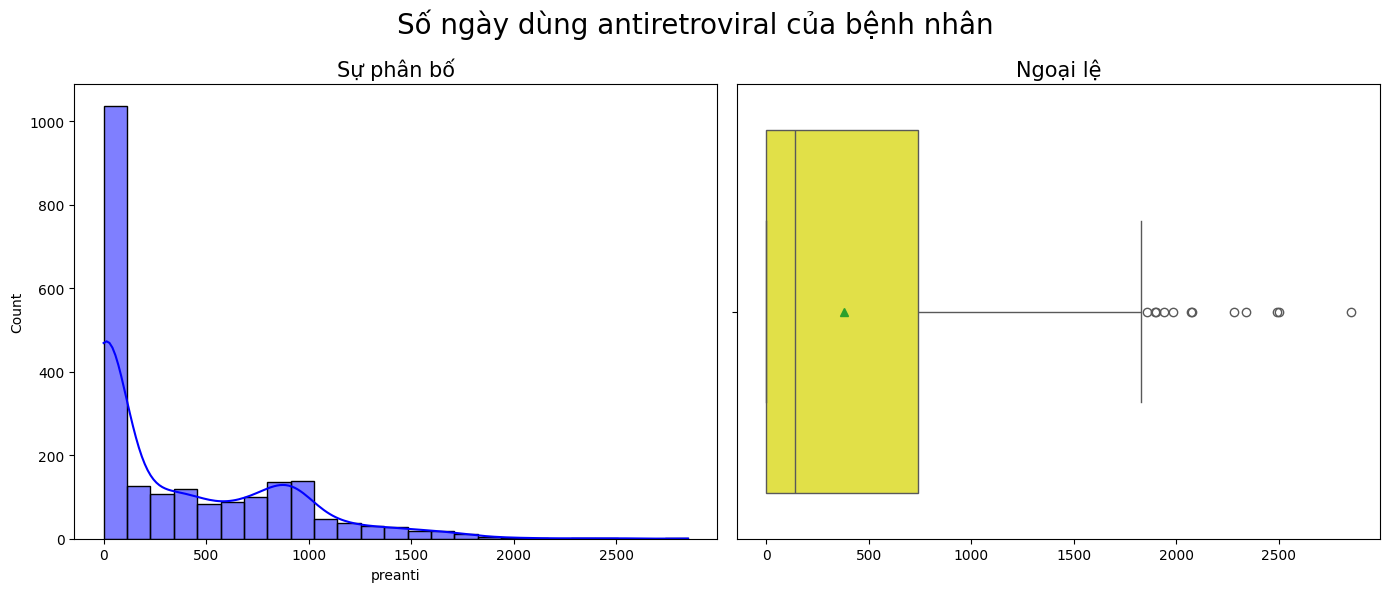

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Số ngày dùng antiretroviral của bệnh nhân', fontsize=20)
axes[0]=sns.histplot(df, x='preanti', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['preanti'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Hầu hết bệnh nhân có số ngày dùng antiretroviral là 0 ngày. Có thể là mới điều trị hay là không điều trị.
- Các giá trị ngoại lệ ở mức cao là trên 1250 ngày. Cần biết, liệu pháp antiretroviral là một phương pháp điều trị suốt đời cho cá bệnh nhân nhiễm HIV/AIDS, nên số ngày được điều trị có thể rất dài tùy thuộc vào tuổi thọ của bệnh nhân, nên những giá trị này sẽ không được xem là những giá trị vô lý và được giữ lại.

### cd40

In [ ]:
df['cd40'].describe()

count    2139.000000
mean      350.501169
std       118.573863
min         0.000000
25%       263.500000
50%       340.000000
75%       423.000000
max      1199.000000
Name: cd40, dtype: float64

In [ ]:
Q1 = np.quantile(df['cd40'], 0.25)
Q1

263.5

In [ ]:
Q3 = np.quantile(df['cd40'], 0.75)
Q3

423.0

In [ ]:
IQR = Q3 - Q1
IQR

159.5

In [ ]:
Range = df['cd40'].max() - df['cd40'].min()
Range

1199

In [ ]:
df['cd40'].var()

14059.760873282543

In [ ]:
df['cd40'].skew()

0.7578678172259868

In [ ]:
df['cd40'].kurtosis()

1.805410671463028

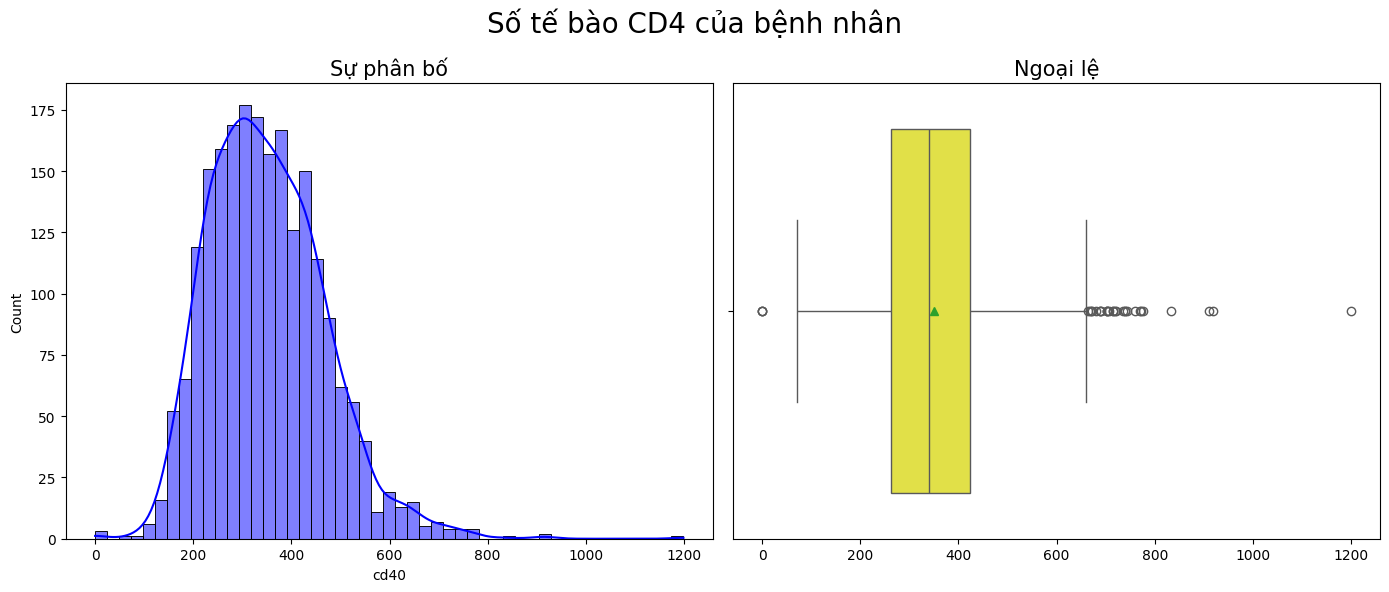

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Số tế bào CD4 của bệnh nhân', fontsize=20)
axes[0]=sns.histplot(df, x='cd40', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['cd40'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Có sự phân bố đa điểm trong đồ thị phân bố của số tế bào CD4 của bệnh nhân.
- Ta có các giá trị ngoại lệ ở mức thấp và mức cao (hơn 650 tế bào).
- Theo nghiên cứu, đối với người khỏe mạnh thì tế bào có thể mức rất cao (trên 1000). Vì thế những giá trị ngoại lệ ở mức cao sẽ được giữ lại.
- Với những giá trị ngoại lệ ở mức thấp, ta sẽ kiểm tra min của dữ liệu. Cần biết giá trị tế bào cd4 có thể gần với mức 0 do nhiễm AIDS. Tuy nhiên, việc chỉ số tế bào này có giá trị 0 là gần như không thể, thế nên ta sẽ loại bỏ những record có giá trị 0 này.

In [ ]:
# Loại bỏ các giá trị 0
df = df[(df['cd40'] > 0)]
df.shape

(2136, 23)

### cd420


In [ ]:
df['cd420'].describe()

count    2136.000000
mean      371.150749
std       144.637561
min        49.000000
25%       269.000000
50%       353.000000
75%       460.000000
max      1119.000000
Name: cd420, dtype: float64

In [ ]:
Q1 = np.quantile(df['cd420'], 0.25)
Q1

269.0

In [ ]:
Q3 = np.quantile(df['cd420'], 0.75)
Q3

460.0

In [ ]:
IQR = Q3 - Q1
IQR

191.0

In [ ]:
Range = df['cd420'].max() - df['cd420'].min()
Range

1070

In [ ]:
df['cd420'].var()

20920.024102483138

In [ ]:
df['cd420'].skew()

0.7328966226757088

In [ ]:
df['cd420'].kurtosis()

1.077551194951814

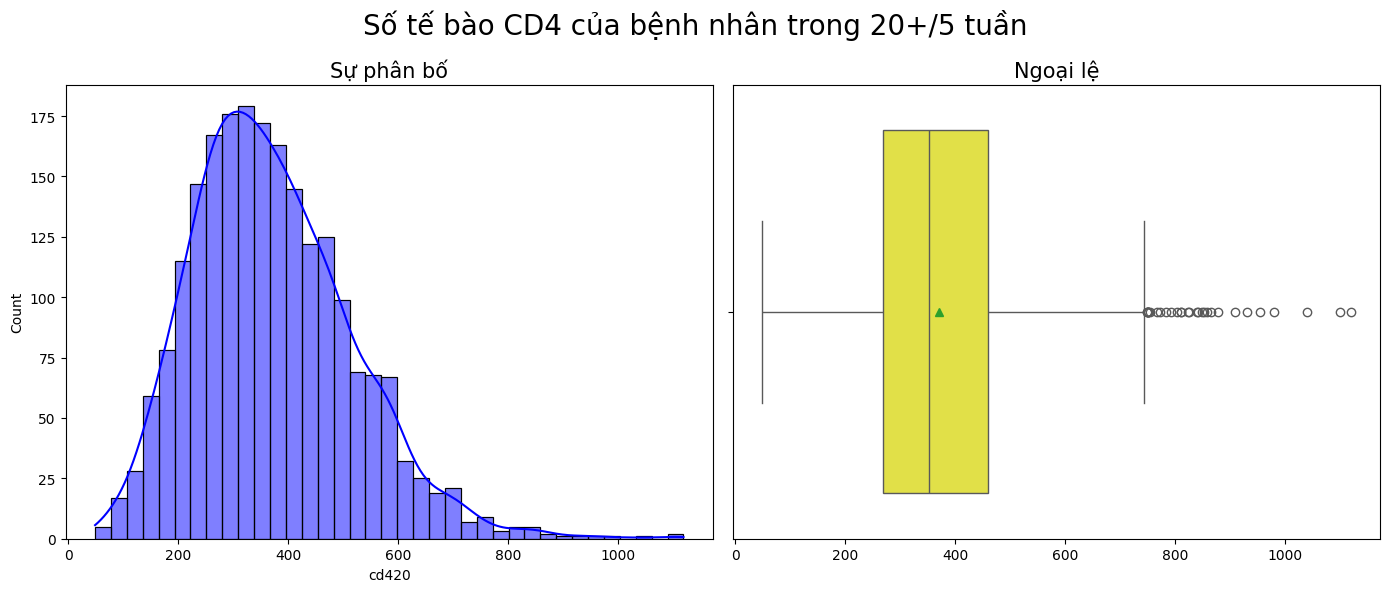

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Số tế bào CD4 của bệnh nhân trong 20+/5 tuần', fontsize=20)
axes[0]=sns.histplot(df, x='cd420', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['cd420'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đồ thị có sự lệch phải.
- Các giá trị ngoại lệ năm ở mức cao (khoảng hơn 850).
- Như đã giải thích ở trên, chúng ta sẽ không loại các giá trị ngoại lệ này.

### cd80

In [ ]:
df['cd80'].describe()

count    2136.000000
mean      986.817884
std       480.398891
min        40.000000
25%       654.000000
50%       893.000000
75%      1208.000000
max      5011.000000
Name: cd80, dtype: float64

In [ ]:
Q1 = np.quantile(df['cd80'], 0.25)
Q1

654.0

In [ ]:
Q3 = np.quantile(df['cd80'], 0.75)
Q3

1208.0

In [ ]:
IQR = Q3 - Q1
IQR

554.0

In [ ]:
Range = df['cd80'].max() - df['cd80'].min()
Range

4971

In [ ]:
df['cd80'].var()

230783.09421865817

In [ ]:
df['cd80'].skew()

1.7333893732347885

In [ ]:
df['cd80'].kurtosis()

6.173129079862598

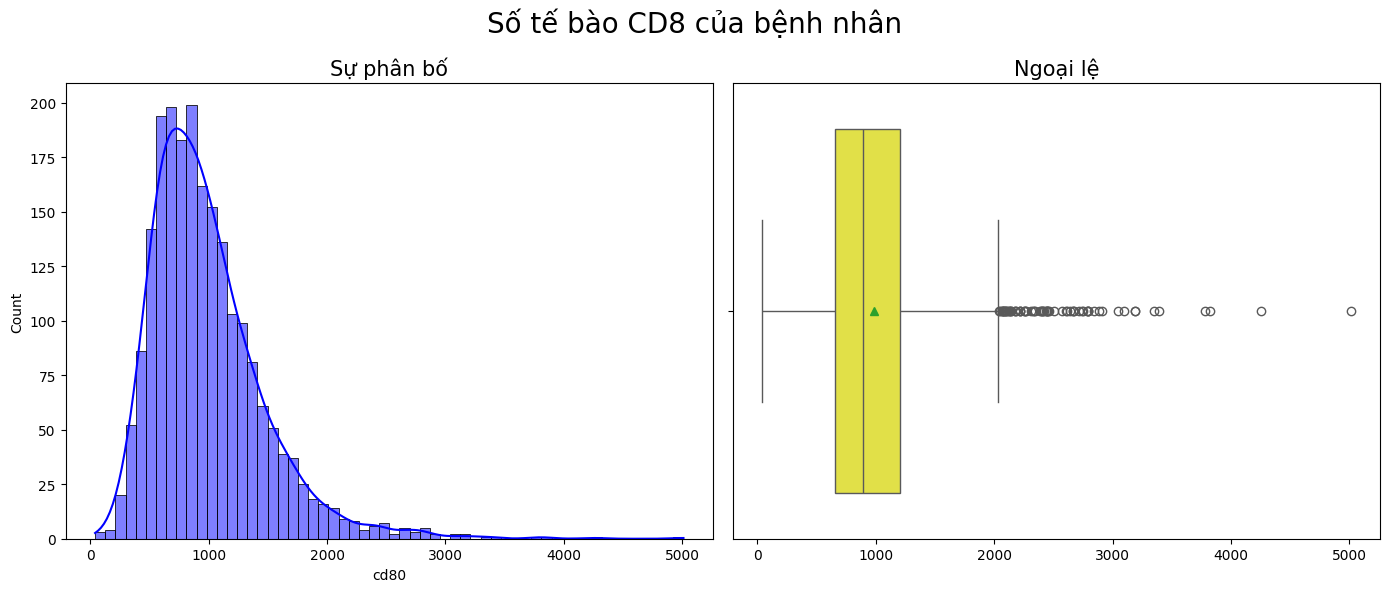

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Số tế bào CD8 của bệnh nhân', fontsize=20)
axes[0]=sns.histplot(df, x='cd80', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['cd80'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đồ thị có xu hướng lệch phải.
- Giá trị ngoại lệ ở mức cao (trên 2000 tế bào).
- Tương tự như cd4, các tế bào cd8 cũng có thể ở mức cao biểu thị cho cơ thể khỏe mạnh. Nên những giá trị này không được xem là ngoại lệ.


### CD820

In [ ]:
df['cd820'].describe()

count    2136.000000
mean      935.061798
std       444.907840
min       124.000000
25%       630.750000
50%       865.000000
75%      1146.250000
max      6035.000000
Name: cd820, dtype: float64

In [ ]:
Q1 = np.quantile(df['cd820'], 0.25)
Q1

630.75

In [ ]:
Q3 = np.quantile(df['cd820'], 0.75)
Q3

1146.25

In [ ]:
IQR = Q3 - Q1
IQR

515.5

In [ ]:
Range = df['cd820'].max() - df['cd820'].min()
Range

5911

In [ ]:
df['cd820'].var()

197942.9863431834

In [ ]:
df['cd820'].skew()

2.094866262222449

In [ ]:
df['cd820'].kurtosis()

11.801725505568552

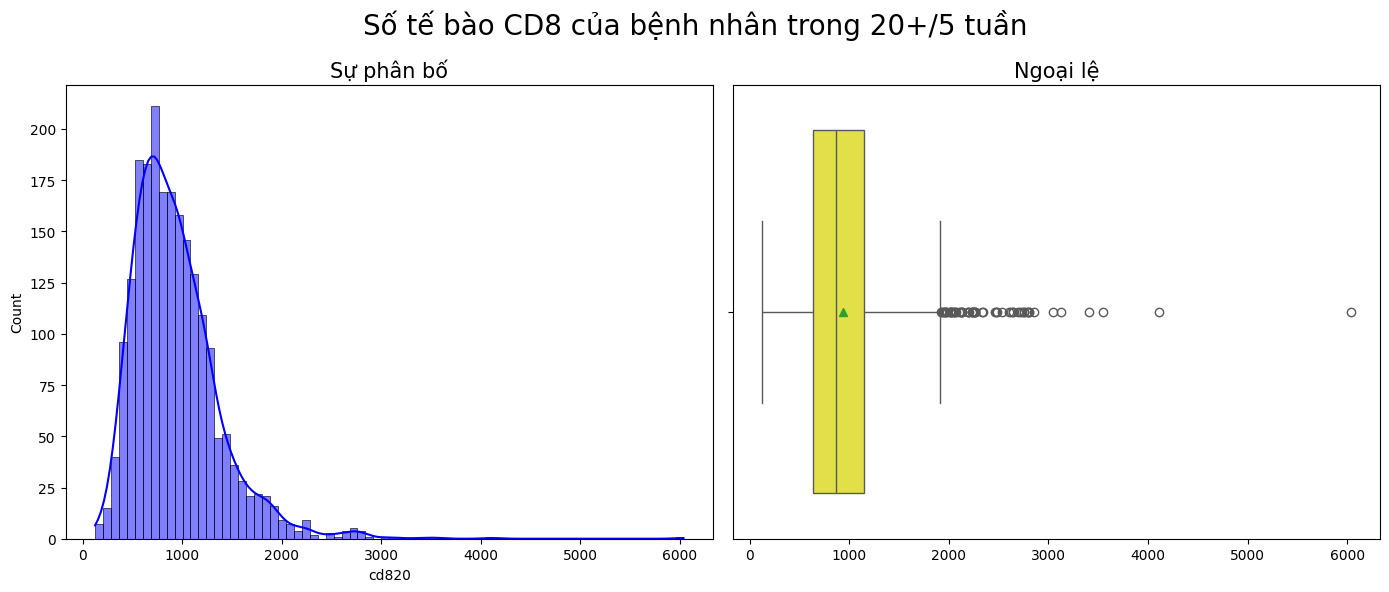

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Số tế bào CD8 của bệnh nhân trong 20+/5 tuần', fontsize=20)
axes[0]=sns.histplot(df, x='cd820', kde=True, color= 'blue', ax=axes[0])
axes[1]=sns.boxplot(x=df['cd820'], color='#FAF92F',showmeans=True, ax=axes[1])
axes[1].set(xlabel=None)

fontsize=15
axes[0].set_title("Sự phân bố",fontdict={'fontsize': fontsize})
axes[1].set_title("Ngoại lệ",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đồ thị có sự lệch phải.
- Các giá trị ngoại lệ năm ở mức cao (khoảng hơn 1750).
- Tương tự, ta cũng sẽ không loại những giá trị này.

## Thuộc tính phân loại

### infected

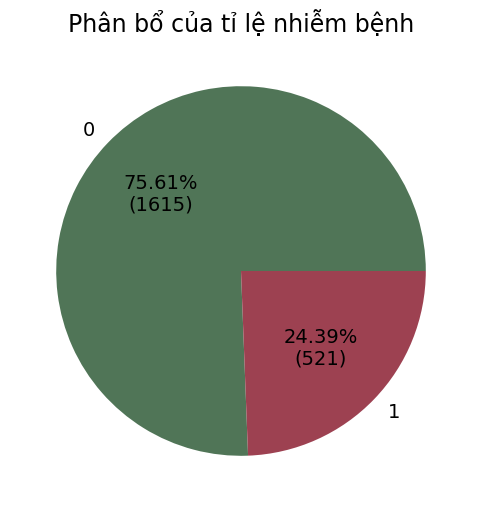

In [ ]:
plt.figure(figsize=(12, 6))

total = len(df['infected'])
def fmt_num(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.pie(df['infected'].value_counts().values, labels=df['infected'].value_counts().index ,colors=['#507557','#9D4151'], textprops={'fontsize': 14}, autopct=fmt_num)
plt.title('Phân bổ của tỉ lệ nhiễm bệnh', fontsize=17)
plt.show()


**Nhận xét**:
- Số người không nhiễm có tỉ lệ cao hơn số người bị nhiễm.

### trt

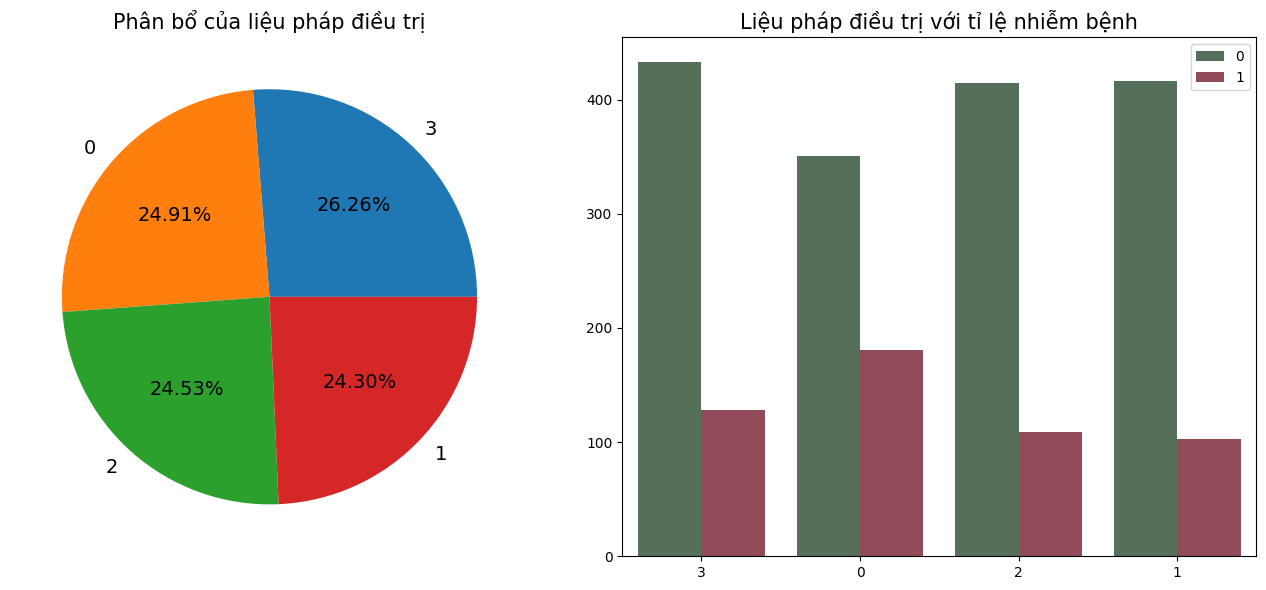

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['trt'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['trt'].value_counts().values, labels=df['trt'].value_counts().index, textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='trt', hue='infected', palette=['#507557','#9D4151'], order=df['trt'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của liệu pháp điều trị', fontdict={'fontsize': fontsize})
ax[1].set_title('Liệu pháp điều trị với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()


**Nhận xét**:
- Số người chỉ sử dụng ddl là cao nhất.
- Những người chỉ sử dụng ZDV có số lượng nhiễm bệnh cao hơn những liệu pháp điều trị khác. Điều này có thể là do những phương pháp điều trị khác có thể cho ra hiệu quả cao hơn so với việc chỉ dùng mỗi ZDV.

### hemo

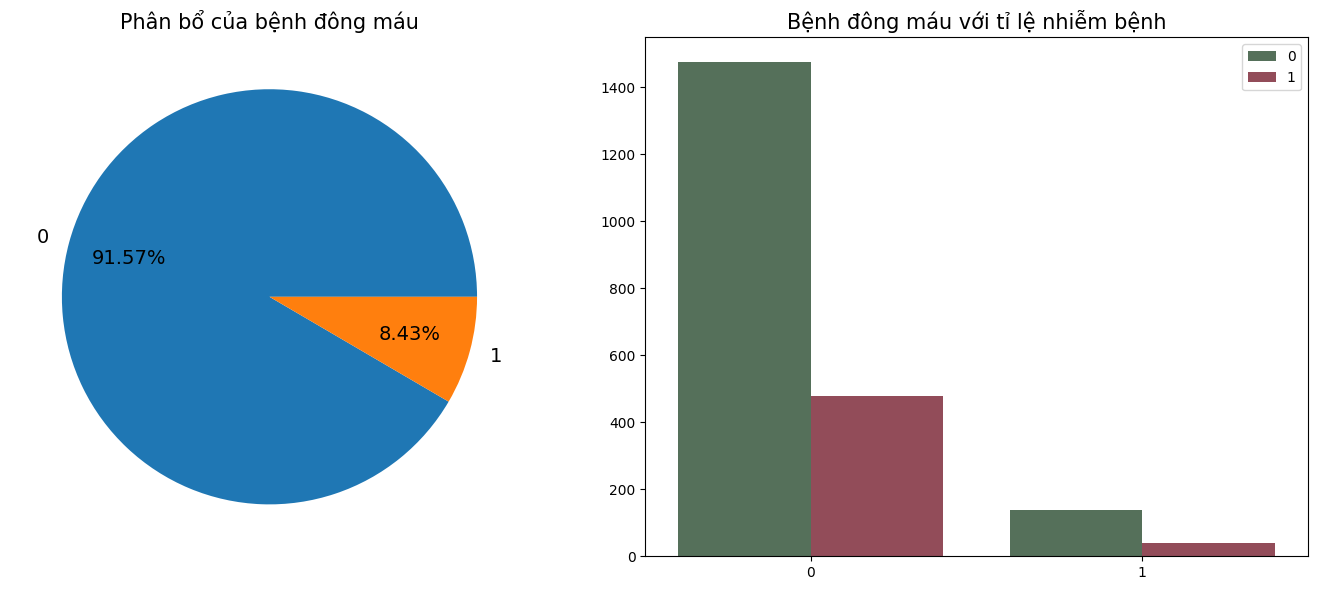

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['hemo'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['hemo'].value_counts().values, pctdistance=0.7, labels=df['hemo'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='hemo', hue='infected', palette=['#507557','#9D4151'], order=df['hemo'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của bệnh đông máu', fontdict={'fontsize': fontsize})
ax[1].set_title('Bệnh đông máu với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Số người không có triệu chứng đông máu chiếm đáng kể.
- Số người có triệu chứng chỉ chiếm phần ít (8.43%).

### homo




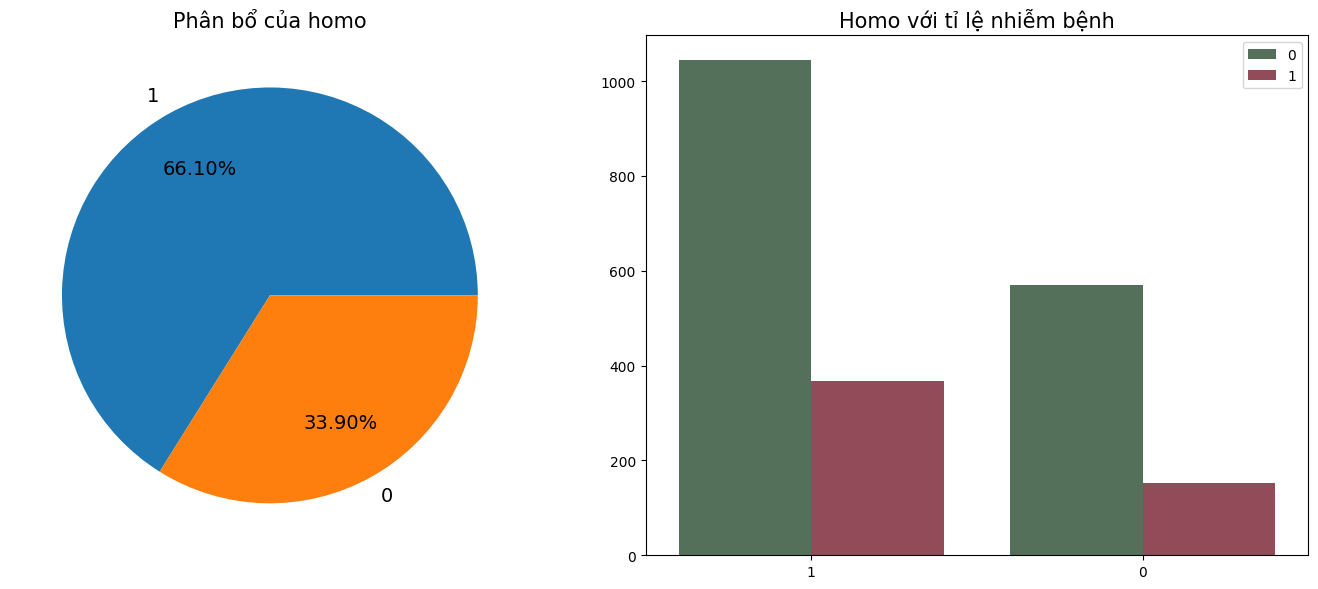

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['homo'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['homo'].value_counts().values, pctdistance=0.7, labels=df['homo'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='homo', hue='infected', palette=['#507557','#9D4151'], order=df['homo'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của homo', fontdict={'fontsize': fontsize})
ax[1].set_title('Homo với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Người có hoạt động đồng tính chiếm tỉ lệ cao hơn.

### drugs

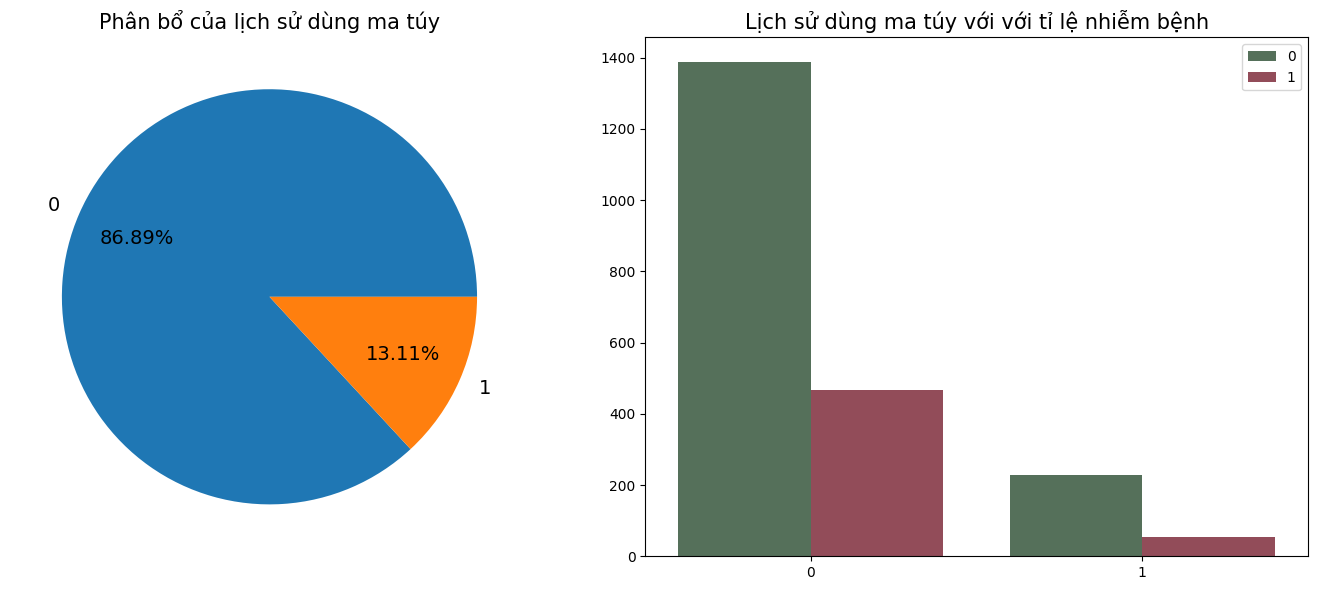

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['drugs'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['drugs'].value_counts().values, pctdistance=0.7, labels=df['drugs'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='drugs', hue='infected', palette=['#507557','#9D4151'], order=df['drugs'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của lịch sử dùng ma túy', fontdict={'fontsize': fontsize})
ax[1].set_title('Lịch sử dùng ma túy với với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Số người không dùng ma túy chiếm nhiều hơn.

### oprior

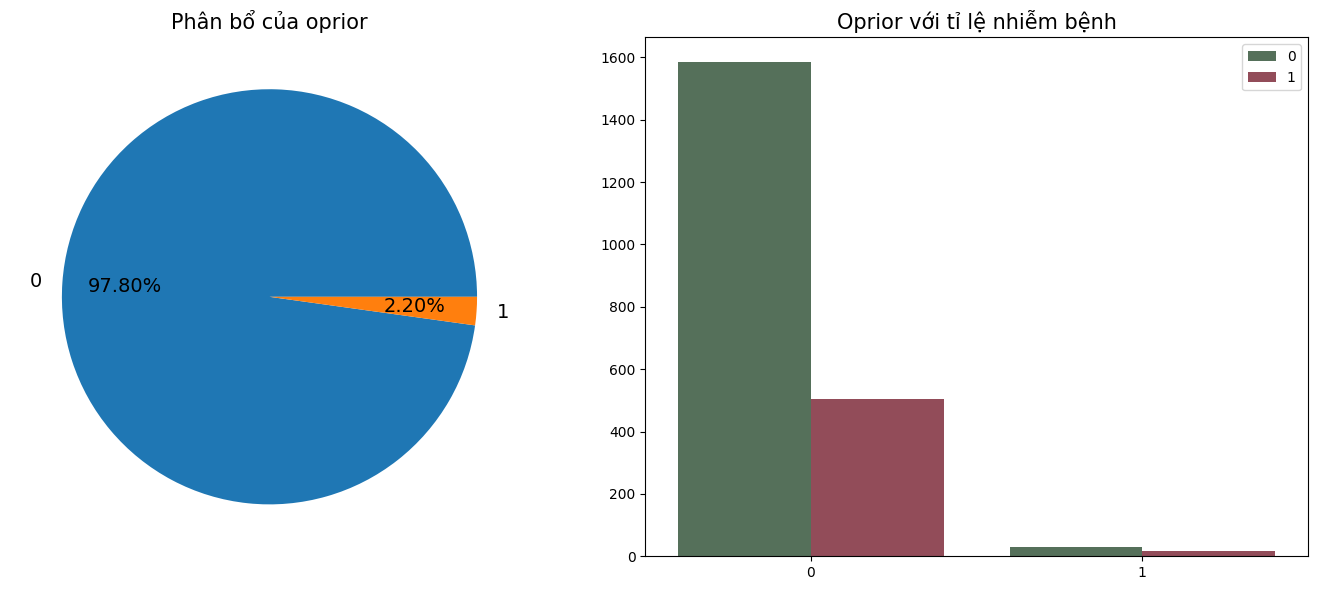

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['oprior'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['oprior'].value_counts().values, pctdistance=0.7, labels=df['oprior'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='oprior', hue='infected', palette=['#507557','#9D4151'], order=df['oprior'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của oprior', fontdict={'fontsize': fontsize})
ax[1].set_title('Oprior với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Số người không dùng nhiều hơn.

### z30

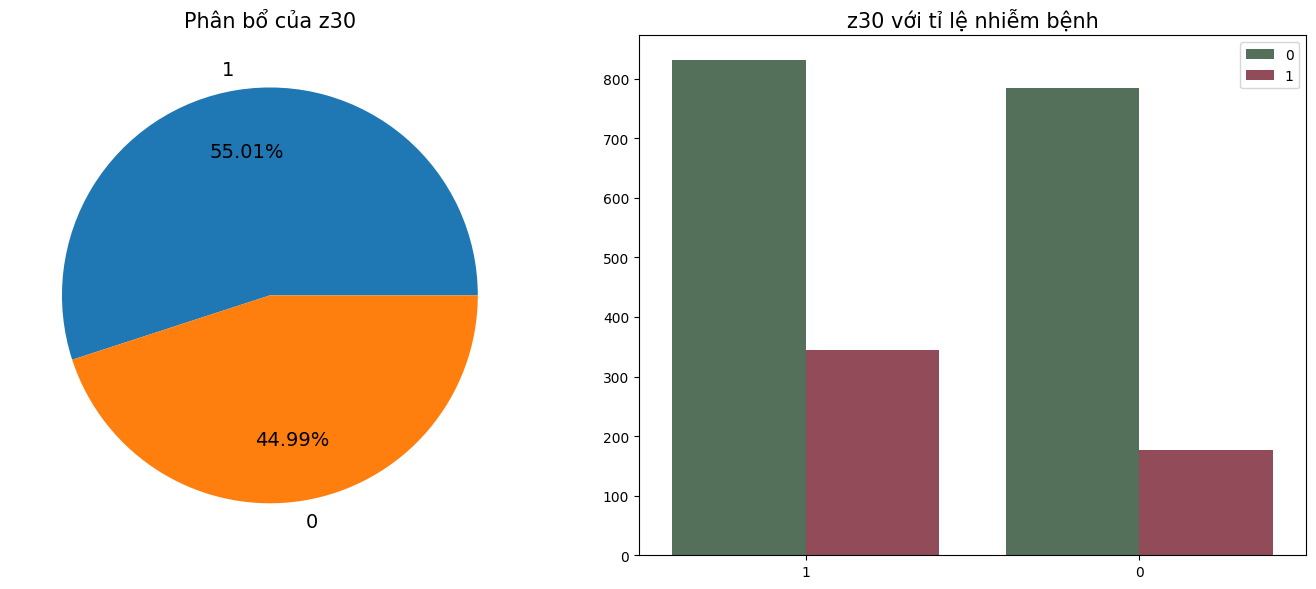

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['z30'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['z30'].value_counts().values, pctdistance=0.7, labels=df['z30'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='z30', hue='infected', palette=['#507557','#9D4151'], order=df['z30'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của z30', fontdict={'fontsize': fontsize})
ax[1].set_title('z30 với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Số người dùng nhiều hơn.
- Ta nhận thấy, số người chỉ dùng ZDV và dùng các phương pháp khác không có sự chệnh lệch nhau quá nhiều, tuy nhiên ở phía những người chỉ dùng ZDV, số người nhiễm lại cao gấp đôi. Điều này một lần nữa lại cho thấy các phương pháp khác mang lại hiệu quả cao hơn so với chỉ dùng ZDV.


### race

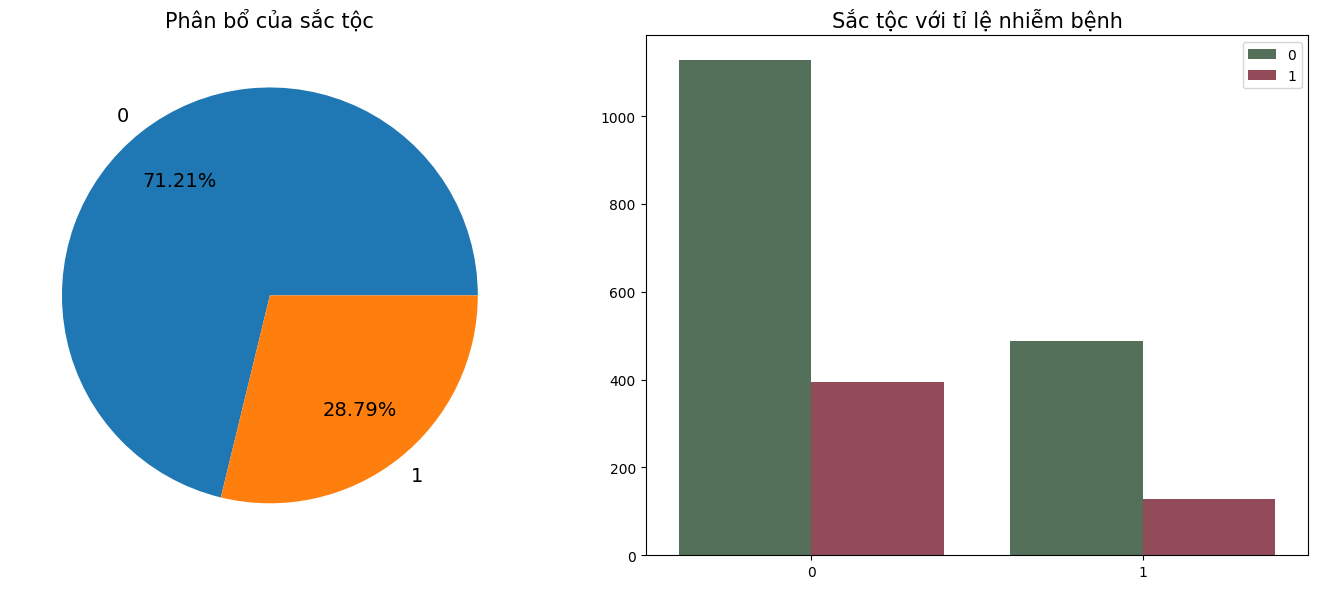

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['race'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['race'].value_counts().values, pctdistance=0.7, labels=df['race'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='race', hue='infected', palette=['#507557','#9D4151'], order=df['race'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của sắc tộc', fontdict={'fontsize': fontsize})
ax[1].set_title('Sắc tộc với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Bệnh nhân có sắc tộc da trắng chiếm tỉ lệ cao hơn.

### gender

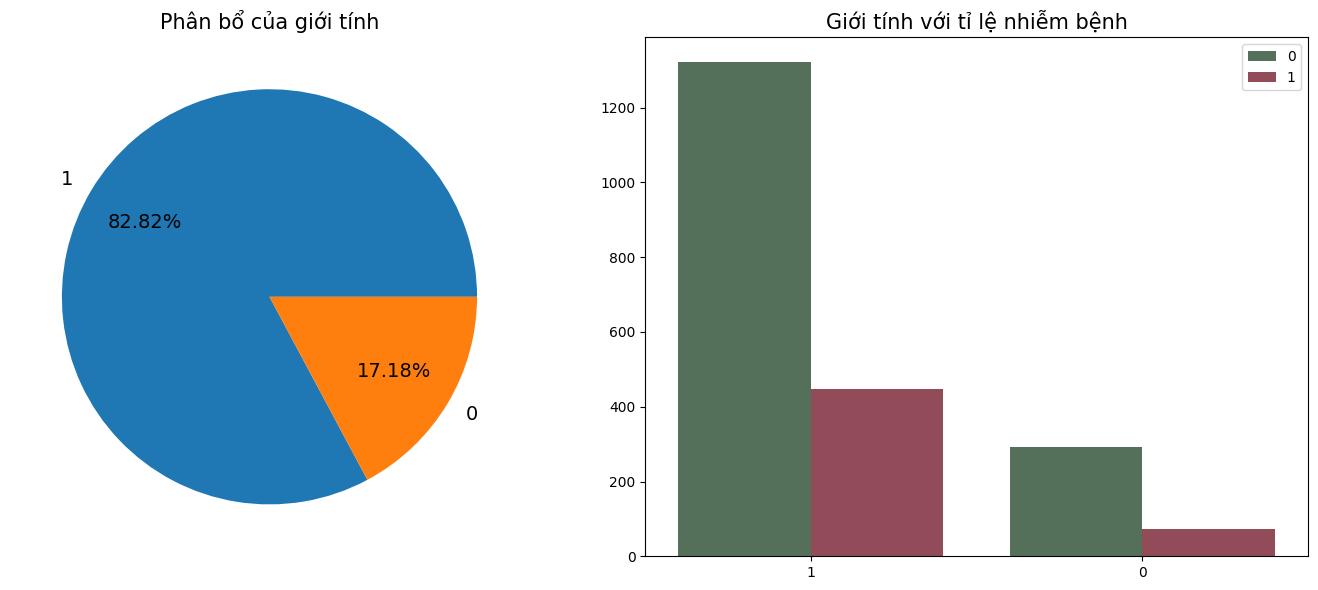

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['gender'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['gender'].value_counts().values, pctdistance=0.7, labels=df['gender'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='gender', hue='infected', palette=['#507557','#9D4151'], order=df['gender'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của giới tính', fontdict={'fontsize': fontsize})
ax[1].set_title('Giới tính với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Bệnh nhân nữ chiếm tỉ lệ cao hơn.


### str2

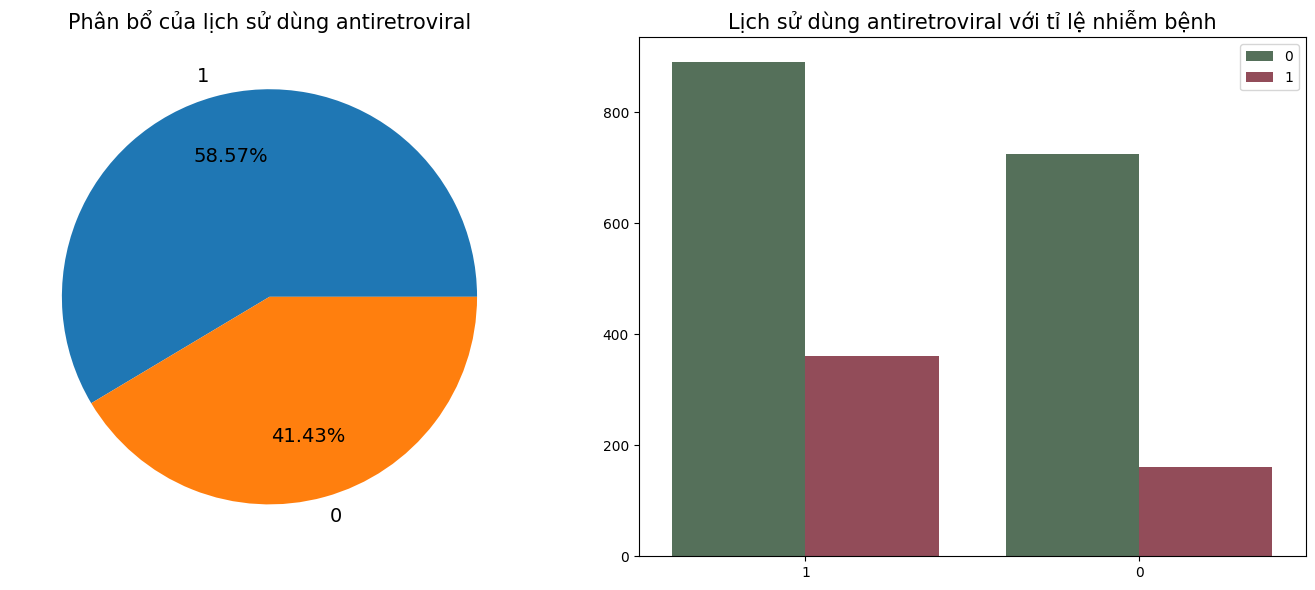

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['str2'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['str2'].value_counts().values, pctdistance=0.7, labels=df['str2'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='str2', hue='infected', palette=['#507557','#9D4151'], order=df['str2'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của lịch sử dùng antiretroviral', fontdict={'fontsize': fontsize})
ax[1].set_title('Lịch sử dùng antiretroviral với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Những người sử dụng cao hơn.
- Những người đã trải nghiệm dùng antiretroviral có số người nhiễm bệnh cao hơn. Do liệu pháp này chủ yếu dành cho người nghi nhiễm HIV/AIDS nên những người đã trải nghiệm qua thì tỉ lệ họ đang nhiễm cũng sẽ cao hơn.

### strat

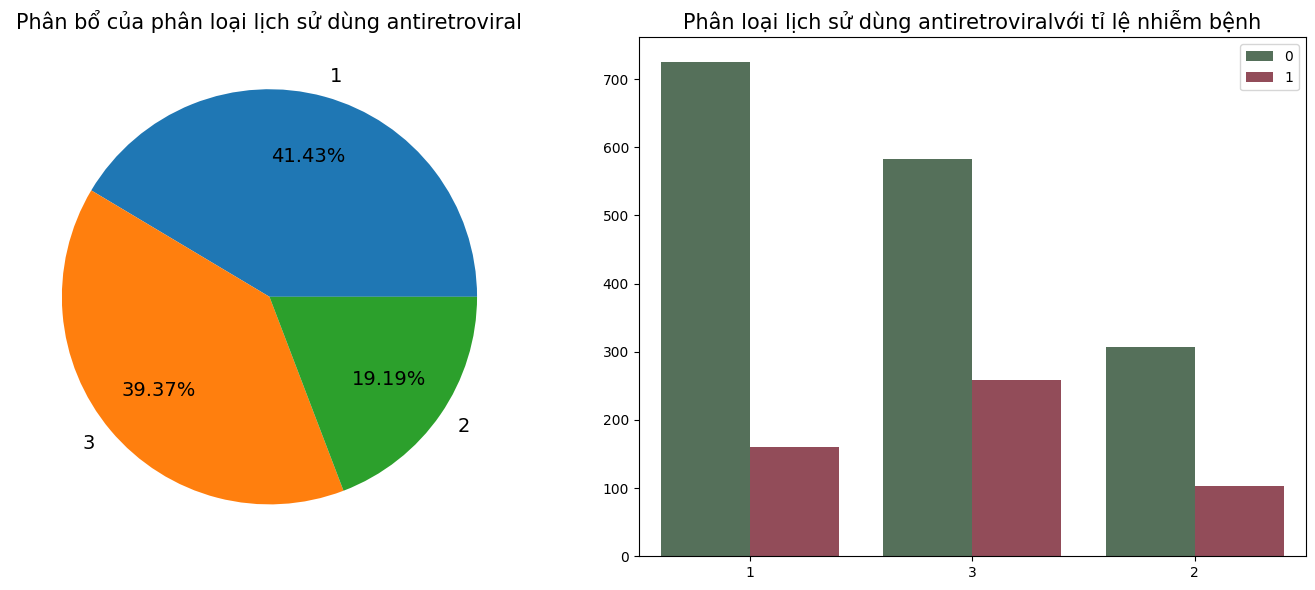

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['strat'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['strat'].value_counts().values, pctdistance=0.7, labels=df['strat'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='strat', hue='infected', palette=['#507557','#9D4151'], order=df['strat'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của phân loại lịch sử dùng antiretroviral', fontdict={'fontsize': fontsize})
ax[1].set_title('Phân loại lịch sử dùng antiretroviralvới tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đa số là những người chưa dùng liệu pháp hoặc dùng liệu pháp trên 52 tuần.
- Những người chưa dùng liệu pháp mặc dù chiếm tỉ lệ cao nhất những lại có số người nhiễm thấp hơn.
- Ngược lại, những người sử dụng liệu pháp này có số người nhiễm cao hơn (giống như phân tích ở phần str2 trước đó).

### symptom

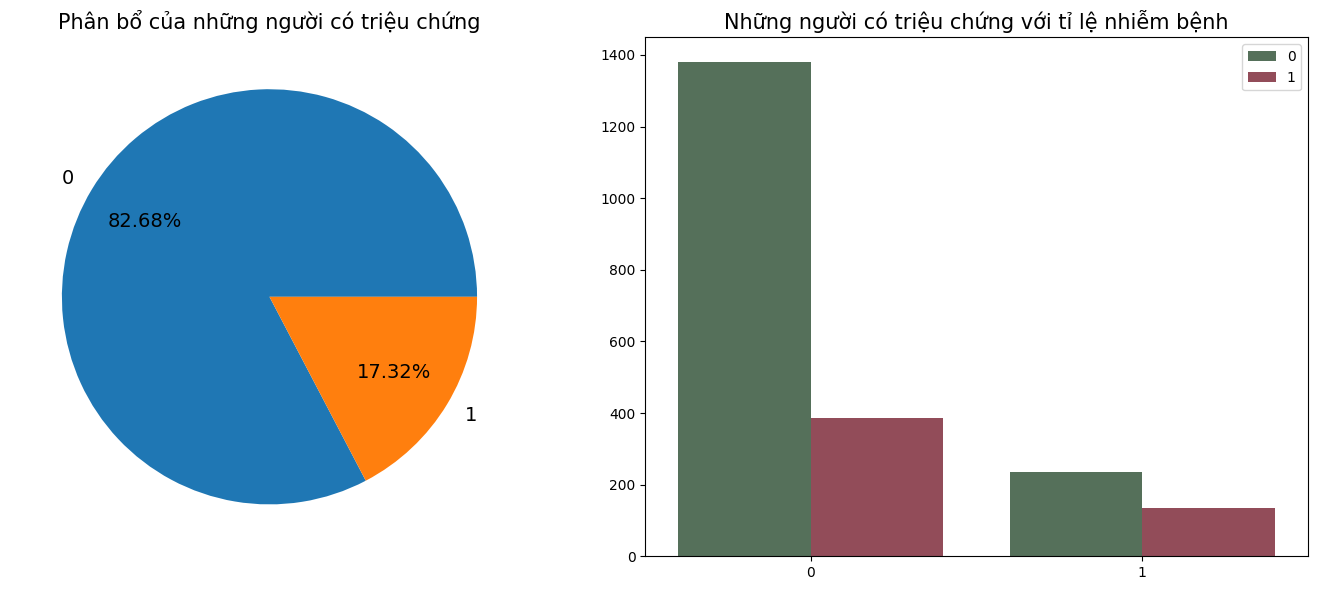

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['symptom'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['symptom'].value_counts().values, pctdistance=0.7, labels=df['symptom'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='symptom', hue='infected', palette=['#507557','#9D4151'], order=df['symptom'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của những người có triệu chứng', fontdict={'fontsize': fontsize})
ax[1].set_title('Những người có triệu chứng với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đa số là những người không có triệu chứng.
- Trong tổng số nghững người có triệu chứng, tỉ lệ người nhiễm cao hơn (50%).

### treat

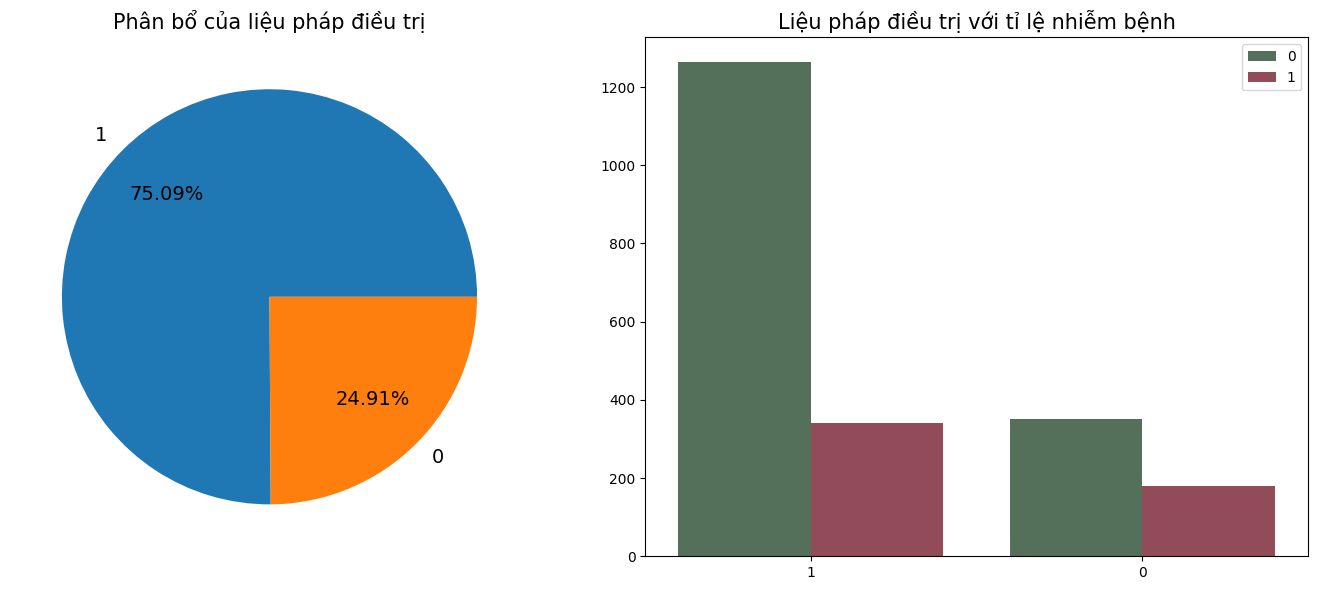

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['treat'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['treat'].value_counts().values, pctdistance=0.7, labels=df['treat'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='treat', hue='infected', palette=['#507557','#9D4151'], order=df['treat'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của liệu pháp điều trị', fontdict={'fontsize': fontsize})
ax[1].set_title('Liệu pháp điều trị với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Hầu hết bệnh nhân sử dụng các liệu pháp khác so với việc chỉ dùng mỗi ZDV.
- Trong tổng số những người chỉ sử dụng ZDV, tỉ lệ người nhiễm chiếm 50%.

### offtrt

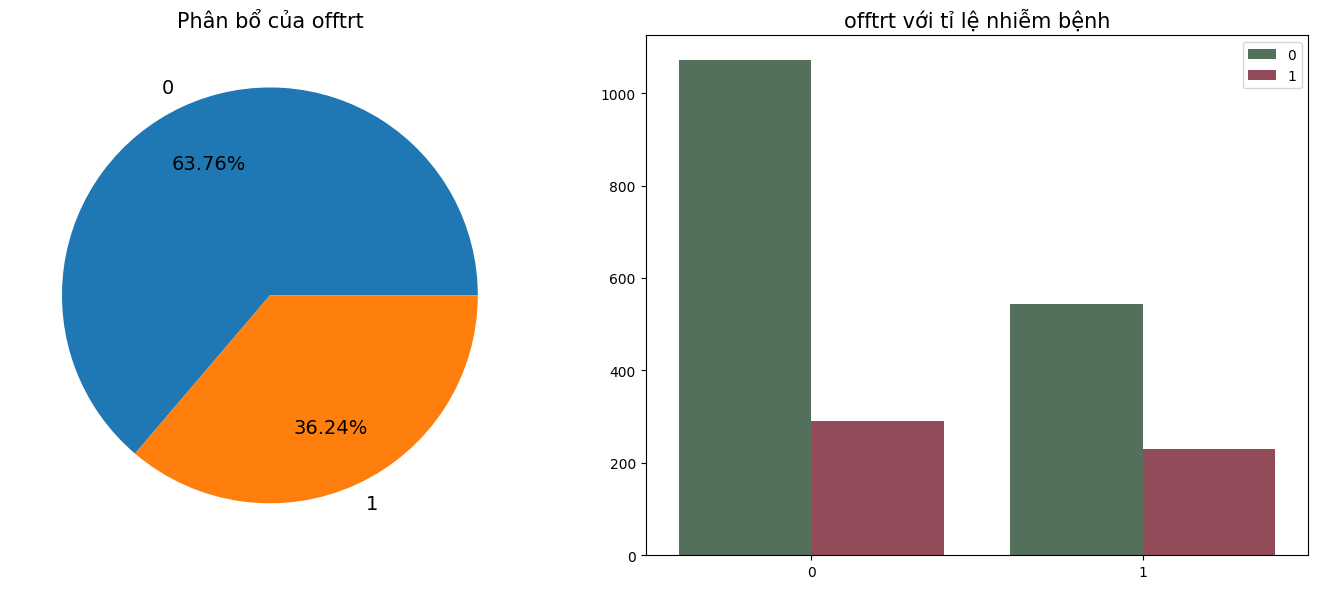

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

total = len(df['offtrt'])
def fmt_num(x):
    return '{:.2f}%'.format(x)

ax[0].pie(df['offtrt'].value_counts().values, pctdistance=0.7, labels=df['offtrt'].value_counts().index , textprops={'fontsize': 14}, autopct=fmt_num)

ax[1] = sns.countplot(data=df, x='offtrt', hue='infected', palette=['#507557','#9D4151'], order=df['offtrt'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize=10)
plt.setp(ax[1].get_legend().get_texts(), fontsize=10)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].legend(bbox_to_anchor=(1,1))

fontsize=15
ax[0].set_title('Phân bổ của offtrt', fontdict={'fontsize': fontsize})
ax[1].set_title('offtrt với tỉ lệ nhiễm bệnh', fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()

**Nhận xét**:
- Đã số là những người không ngừng việc chữa trị trước thời điểm 96 +/- 5 tuần.
- Những người ngừng trước thời điểm này có tỉ lệ người nhiễm cao hơn (gần 50%). Điề này cho thấy, liệu pháp antiretroviral này đóng góp một phần quan trọng trong việc ngăn ngừa virus phát tán.

## Biểu đồ tương quan

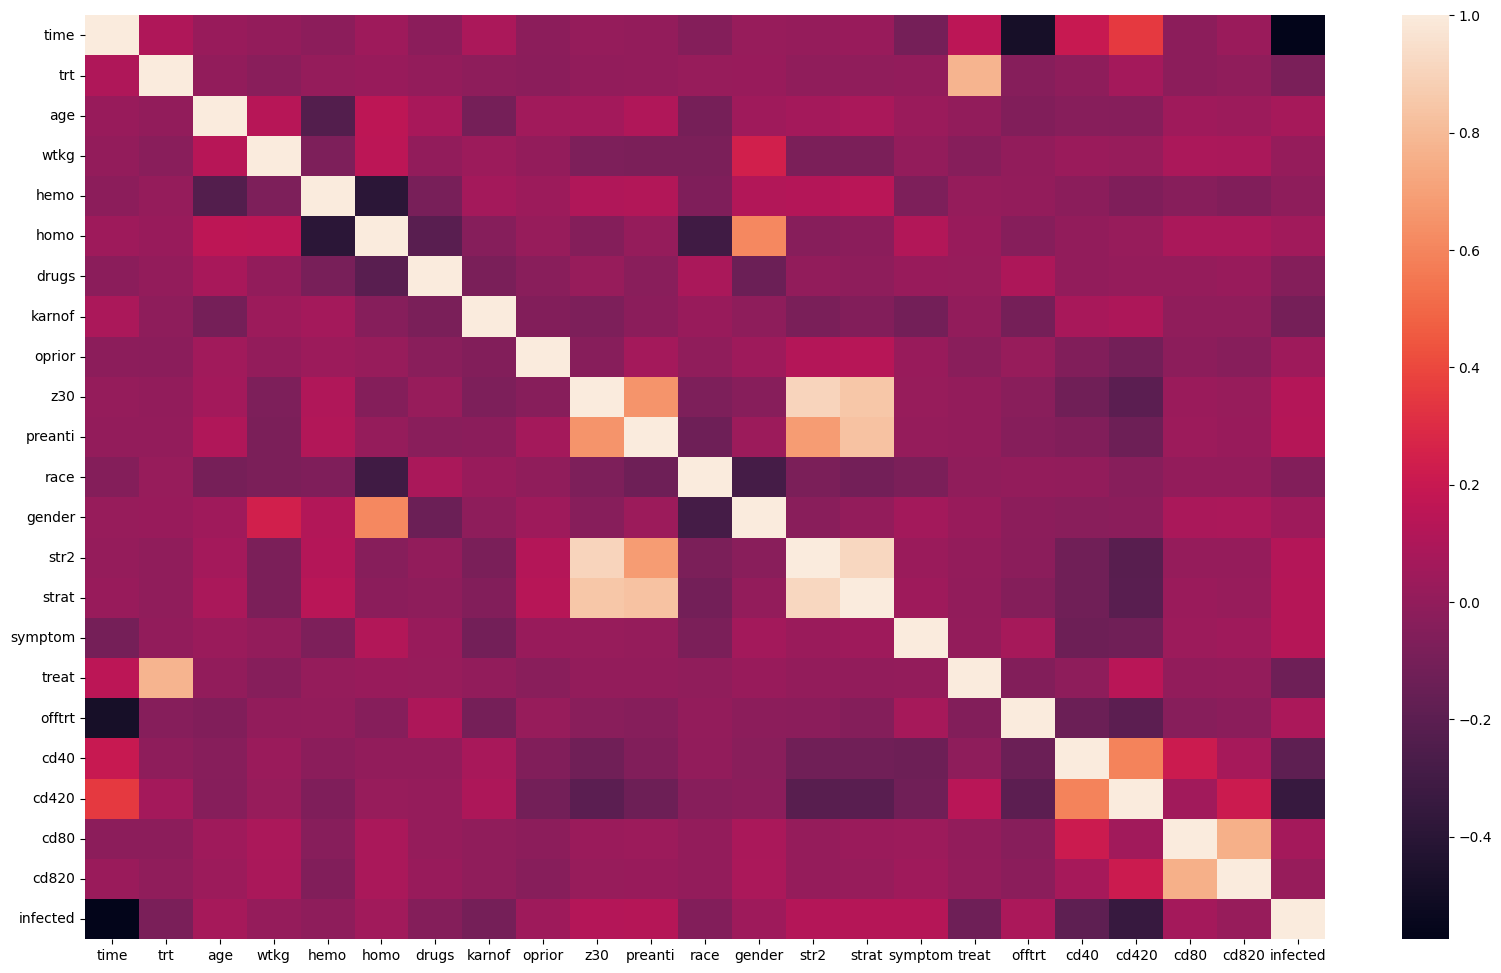

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=False)
plt.show()

# Huấn luyện mô hình dự đoán AIDS

## Chuẩn bị tập dữ liệu

In [ ]:
df.shape

(2136, 23)

In [ ]:
# Chia tập dữ liệu thành tập đặc trưng (X) và tập mục tiêu đầu ra (Y)
X = df.drop('infected', axis=1)
y = df['infected']

In [ ]:
# Chia tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1708, 22), (1708,), (428, 22), (428,))

In [ ]:
# Cân bằng dữ liệu
smote = SMOTE(random_state=14)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2602, 22), (2602,), (428, 22), (428,))

## Scale dữ liệu
- Ở phần EDA trước đó, chúng ta thấy rằng các giá trị có rất nhiều sự khác biệt. Như tuổi thì nằm trong khoẳng 40-60, time thì 600-1200. Thế nên việc scale dữ liệu là cần thiết để giúp cho quá trình train dữ liệu được tốt hơn.
- Cũng ở phần EDA, ta nhận thấy các dữ liệu hầu như không có phân phối chuẩn. Nên thích hợp nhất là ta sẽ dùng MinMaxScaler để scale dữ liệu.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[0.88989318, 0.        , 0.20689655, ..., 0.39813084, 0.14685174,
        0.11365176],
       [0.79539852, 0.        , 0.39655172, ..., 0.2682243 , 0.33614967,
        0.16937669],
       [0.86688578, 0.66666667, 0.20689655, ..., 0.34859813, 0.06276403,
        0.05284553],
       ...,
       [0.59326212, 0.66666667, 0.51724138, ..., 0.15981308, 0.29672098,
        0.20189702],
       [0.66064092, 0.        , 0.29310345, ..., 0.22429907, 0.15811708,
        0.0850271 ],
       [0.38701726, 0.66666667, 0.29310345, ..., 0.16261682, 0.19955743,
        0.15362466]])

## Xây dựng mô hình
- Ở phần xây dựng mô hình này, ta sẽ dụng AutoLogging-ML để chạy các kết quả dự đoán với các mô hình khác nhau, sau đó ta sẽ lựa ra 3 mô hình có điểm số cao nhất, xây dựng lại các mô hình đó để cải thiện các đánh giá của mô hình.

In [ ]:
!pip install AutoLogging-ML
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.0 MB/s eta 0:00:00


In [ ]:
from AutoLogging_ML import AutoLogger
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')

In [ ]:
r

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
10,quadratic discriminant analysis,85.511145,85.574724,85.511145,85.504669,"[[1085, 216], [161, 1140]]",73.598131,66.076960,65.803442,65.934848,"[[259, 55], [58, 56]]",precision recall f1-score ...,precision recall f1-score ...
0,naive bayes,82.436587,82.544743,82.436587,82.421983,"[[1035, 266], [191, 1110]]",73.831776,66.335049,65.962677,66.139241,"[[260, 54], [58, 56]]",precision recall f1-score ...,precision recall f1-score ...
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[1301, 0], [0, 1301]]",81.308411,76.202907,78.600961,77.182460,"[[265, 49], [31, 83]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,88.508839,88.715270,88.508839,88.493501,"[[1199, 102], [197, 1104]]",81.542056,76.376116,77.642753,76.952073,"[[270, 44], [35, 79]]",precision recall f1-score ...,precision recall f1-score ...
6,logistic regression,89.623367,89.644447,89.623367,89.621987,"[[1181, 120], [150, 1151]]",81.775701,76.659377,77.243267,76.939655,"[[273, 41], [37, 77]]",precision recall f1-score ...,precision recall f1-score ...
8,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[1301, 0], [0, 1301]]",83.644860,80.111284,76.002905,77.625093,"[[290, 24], [46, 68]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,92.851653,92.863910,92.851653,92.851142,"[[1197, 104], [82, 1219]]",84.112150,79.524269,80.791150,80.109349,"[[276, 38], [30, 84]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,99.500384,99.500414,99.500384,99.500384,"[[1295, 6], [7, 1294]]",86.448598,83.083324,81.545424,82.258433,"[[289, 25], [33, 81]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,95.964643,95.966842,95.964643,95.964594,"[[1253, 48], [57, 1244]]",86.915888,83.094587,83.819421,83.443855,"[[284, 30], [26, 88]]",precision recall f1-score ...,precision recall f1-score ...
2,random forest,100.000000,100.000000,100.000000,100.000000,"[[1301, 0], [0, 1301]]",87.149533,83.714156,83.140574,83.419616,"[[288, 26], [29, 85]]",precision recall f1-score ...,precision recall f1-score ...


### Tiêu chí lựa chọn mô hình
- Đảm báo việc dự đoán trên tập train cao hơn 90%.
- Do đây là mô hình dùng để dự đoán bệnh bên y tế, nên ta sẽ quan tâm các chỉ số về accurancy và recall. Đặc biệt là recall, cần độ nhạy cao để có thể phát hiện và điều trị sớm.

**Kết luận**: Dựa trên các tiêu chí đánh giá trên thì 3 mô hình tốt nhất bao gồm Gradient boost, Random Forest và XGboost.

## Cải thiện mô hình


In [ ]:
def danh_gia(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Độ chính xác: {accuracy}")
  print("Báo cáo phân loại:")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def plot_roc(model, X_test, y_test):
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
  plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
danh_gia(y_test, y_pred)

Độ chính xác: 0.866822429906542
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       314
           1       0.74      0.76      0.75       114

    accuracy                           0.87       428
   macro avg       0.83      0.83      0.83       428
weighted avg       0.87      0.87      0.87       428



#### Tối ưu hóa siêu tham số

In [ ]:
scorer = make_scorer(recall_score, pos_label=1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, verbose=2, scoring=scorer)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score, pos_label=1), verbose=2)

Độ chính xác: 0.8738317757009346
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       314
           1       0.76      0.77      0.77       114

    accuracy                           0.87       428
   macro avg       0.84      0.84      0.84       428
weighted avg       0.87      0.87      0.87       428



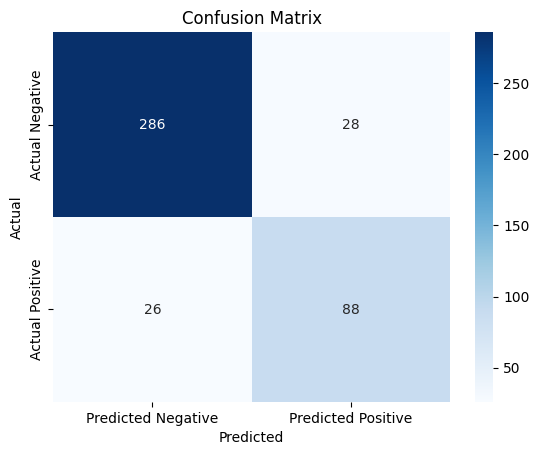

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
danh_gia(y_test, y_pred)


**Nhận xét**: Ta thấy, phương pháp tìm siêu tham số đã cải thiện được độ chính xác, cũng như các đánh giá về precision, recall và f1-score cũng được cải thiện trên nhãn dương tính (nhãn 1).

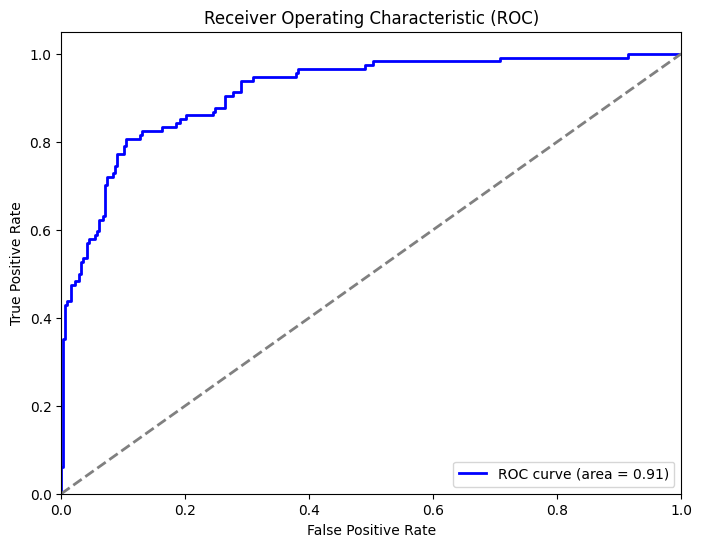

In [ ]:
plot_roc(grid_search.best_estimator_, X_test, y_test)

#### Chọn lọc đặc trưng

Độ chính xác: 0.8714953271028038
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       314
           1       0.77      0.75      0.76       114

    accuracy                           0.87       428
   macro avg       0.84      0.83      0.83       428
weighted avg       0.87      0.87      0.87       428



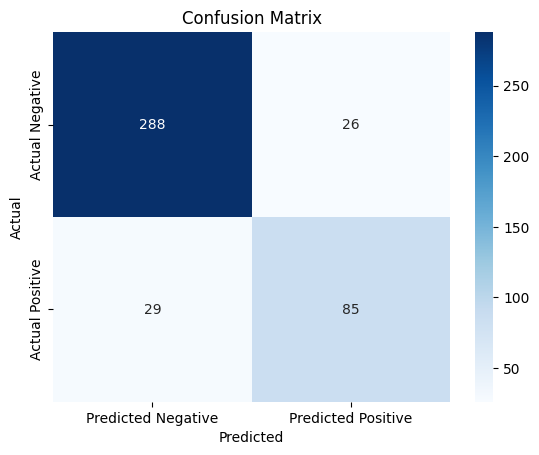

In [ ]:
rfe = RFE(rf_model, n_features_to_select=0.90)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

rf_rfe = RandomForestClassifier(random_state=42)
rf_rfe.fit(X_train_rfe, y_train)
y_pred = rf_rfe.predict(X_test_rfe)
danh_gia(y_test, y_pred)

**Nhận xét**:
- Độ chính xác tăng nhẹ.
- Độ nhạy recall ở nhãn âm tính tăng nhẹ
- Precision ở nhãn dương tính tăng nhẹ, nhưng giá trị recall ở nhãn dương tính giảm nhẹ.

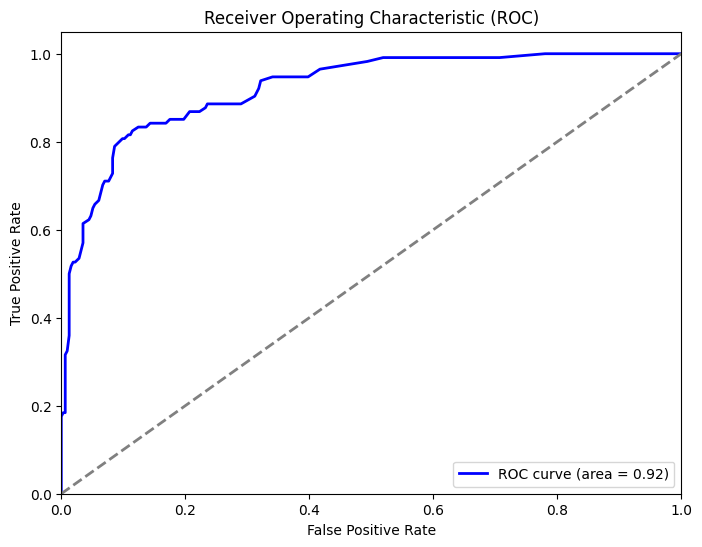

In [ ]:
plot_roc(rf_rfe, X_test_rfe, y_test)

### Gradient Boost Classifier


In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

Độ chính xác: 0.8691588785046729
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       314
           1       0.75      0.77      0.76       114

    accuracy                           0.87       428
   macro avg       0.83      0.84      0.83       428
weighted avg       0.87      0.87      0.87       428



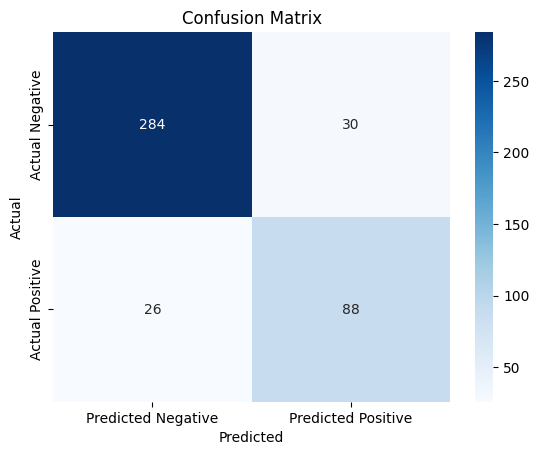

In [ ]:
y_pred = gbc_model.predict(X_test)
danh_gia(y_test, y_pred)

In [ ]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


#### Tối ưu hóa siêu tham số

In [ ]:
gbc_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=gbc_model, param_grid=gbc_grid, cv=3, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END le

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [ ]:
grid_search.best_params_
# {'learning_rate': 0.1,
#  'max_depth': 5,
#  'max_features': 'log2',
#  'min_samples_leaf': 4,
#  'min_samples_split': 10,
#  'n_estimators': 300,
#  'subsample': 1.0}

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300,
 'subsample': 1.0}

Độ chính xác: 0.883177570093458
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       314
           1       0.80      0.75      0.77       114

    accuracy                           0.88       428
   macro avg       0.86      0.84      0.85       428
weighted avg       0.88      0.88      0.88       428



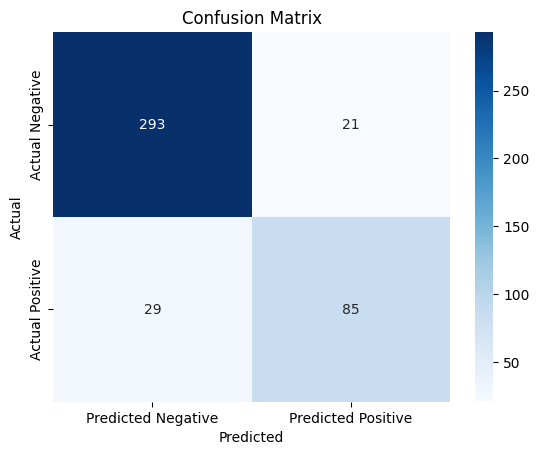

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
danh_gia(y_test, y_pred)

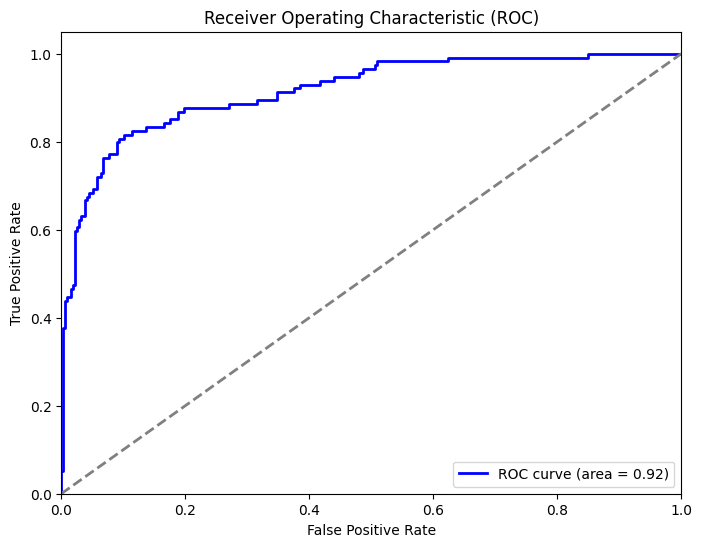

In [ ]:
plot_roc(grid_search.best_estimator_, X_test, y_test)

### XG Boost Classifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Độ chính xác: 0.8855140186915887
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       314
           1       0.79      0.77      0.78       114

    accuracy                           0.89       428
   macro avg       0.86      0.85      0.85       428
weighted avg       0.88      0.89      0.89       428



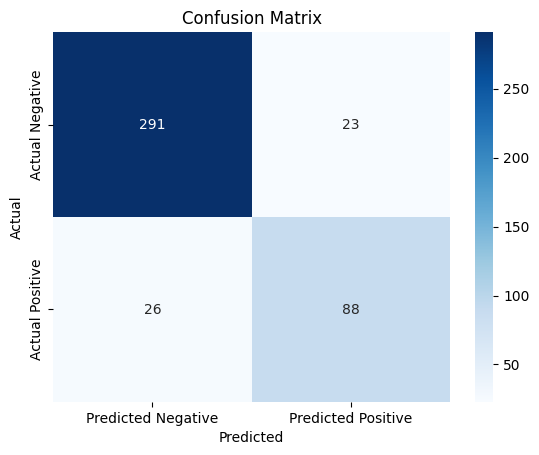

In [ ]:
y_pred = xgb_model.predict(X_test)
danh_gia(y_test, y_pred)

#### Tối ưu hóa siêu tham số

In [ ]:
xgb_grid =  {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
    }
xgb_rand_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_grid, scoring=scorer, verbose=3, cv=5)
xgb_rand_search.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.769 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.988 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.988 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.992 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, sc

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring=make_scorer(recall_score, pos_label=1), verbose=3)

In [ ]:
xgb_rand_search.best_params_
# {'colsample_bytree': 0.6,
#  'gamma': 0,
#  'learning_rate': 0.01,
#  'max_depth': 7,
#  'min_child_weight': 1,
#  'n_estimators': 100,
#  'subsample': 1.0}

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1.0}

Độ chính xác: 0.866822429906542
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       314
           1       0.74      0.76      0.75       114

    accuracy                           0.87       428
   macro avg       0.83      0.83      0.83       428
weighted avg       0.87      0.87      0.87       428



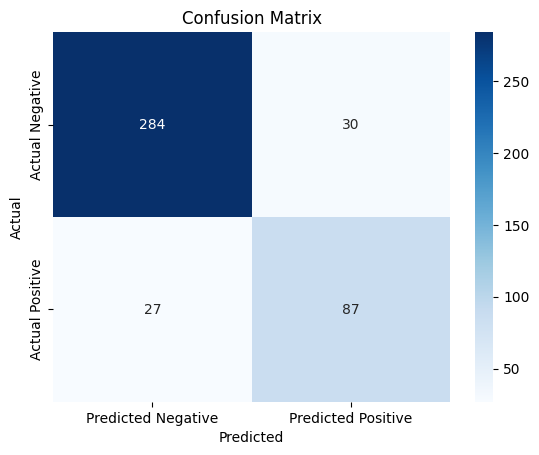

In [ ]:
y_pred = xgb_rand_search.predict(X_test)
danh_gia(y_test, y_pred)